In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import MultinomialNB

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Uploading file from local system
from google.colab import files
uploaded = files.upload()
# Load dataset into a DataFrame
import pandas as pd

# Use the correct filename after upload (check the name exactly)
df = pd.read_csv('spam_ham_dataset.csv')
df.head()


Saving spam_ham_dataset.csv to spam_ham_dataset.csv


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# Step 3: Basic EDA
print("Shape of dataset:", df.shape)
print(df['label'].value_counts())

# Drop unwanted columns if present
df = df[['label', 'text']]  # assuming these are the correct column names
df.columns = ['label', 'text']
df.head()


Shape of dataset: (5171, 4)
label
ham     3672
spam    1499
Name: count, dtype: int64


,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
# Step 4: Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# Step 5: Text Preprocessing
ps = PorterStemmer()
corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Create new column for cleaned text
df['cleaned_text'] = corpus


In [ ]:
# Step 6: Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label'].values


In [ ]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 8: Model Training (Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy: 0.961352657004831
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       742
           1       0.92      0.95      0.93       293

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



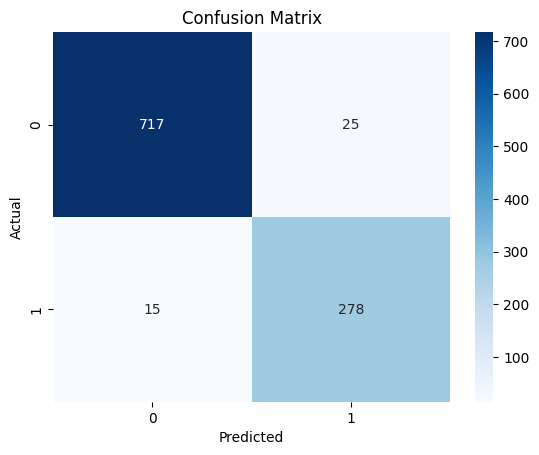

In [ ]:
# Step 9: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Step 10: Predict on custom SMS messages
def predict_sms(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    vec = tfidf.transform([review]).toarray()
    pred = model.predict(vec)
    return "Spam" if pred[0] == 1 else "Ham"

# Example 1: Spam
example_spam = "Congratulations! You've won a free ticket to Bahamas. Text WIN to 12345 now!"
print(f"Message: {example_spam}\nPrediction: {predict_sms(example_spam)}\n")

# Example 2: Ham
example_ham = "Hey, are we still on for the meeting tomorrow at 10am?"
print(f"Message: {example_ham}\nPrediction: {predict_sms(example_ham)}")


Message: Congratulations! You've won a free ticket to Bahamas. Text WIN to 12345 now!
Prediction: Spam

Message: Hey, are we still on for the meeting tomorrow at 10am?
Prediction: Ham
